<a href="https://colab.research.google.com/github/kingketan9/DeepLearningLabs/blob/main/Ass5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Use the Wine.csv Dataset to realize the Principal Component Analysis technique.


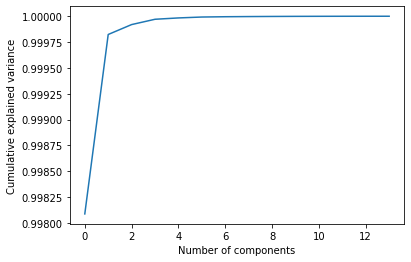

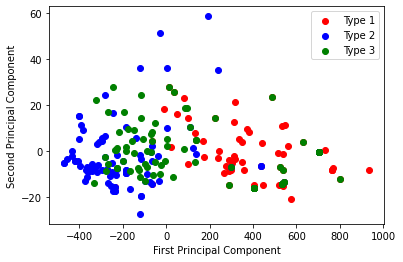

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("Wine.csv")

# Create the feature matrix
X = df.iloc[:, :].values

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

# Choose the number of components
n_components = 2

# Re-perform PCA with the chosen number of components
pca = PCA(n_components)
X_pca = pca.fit_transform(X)

# Plot the data
colors = ["red", "blue", "green"]
for i, color in enumerate(colors):
    indices = np.where(df == i+1)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], c=color, label=f"Type {i+1}")

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.show()

Q2. Use the appropriate dataset to realize multiple linear regression and show that how various statistical tools like p-value, t-score etc can be used for dimensionality reduction.


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

df = pd.read_csv("50_Startups.csv")
df = df.drop(['State'],axis=1)

# Create the feature matrix and target vector
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Perform multiple linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Use the statsmodels library to obtain the p-values and t-scores
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# Extract the p-values and t-scores
p_values = results.pvalues
t_scores = results.tvalues

# Use the p-values for dimensionality reduction
# Select only the features with p-values below a threshold
threshold = 0.05
selected_features = np.where(p_values < threshold)[0]
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Re-perform the regression on the selected features
regressor = LinearRegression()
regressor.fit(X_train_selected, y_train)

# Evaluate the performance of the reduced model
y_pred = regressor.predict(X_test_selected)
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     210.3
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           7.20e-23
Time:                        05:44:20   Log-Likelihood:                -420.19
No. Observations:                  40   AIC:                             848.4
Df Residuals:                      36   BIC:                             855.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.626e+04   7864.245      7.154      0.0